In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/Devyani/msads/ml1/project/projdata.csv")

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


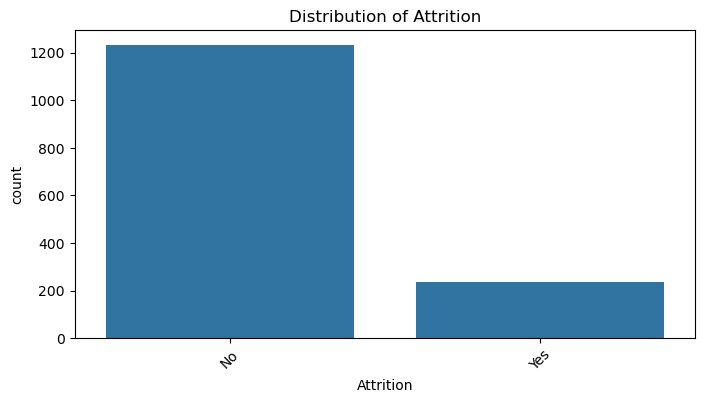

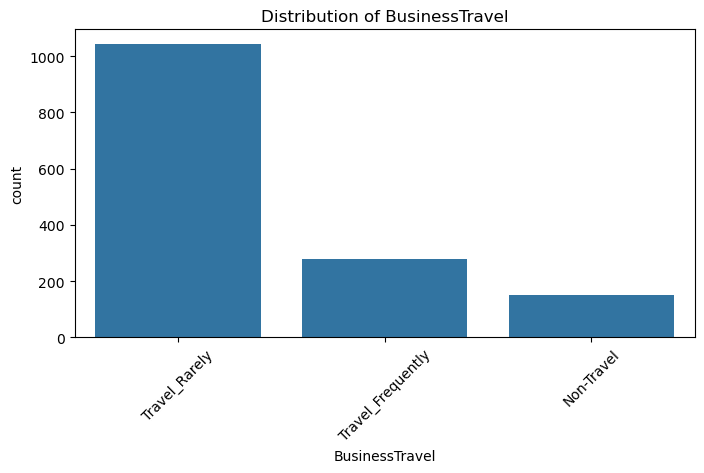

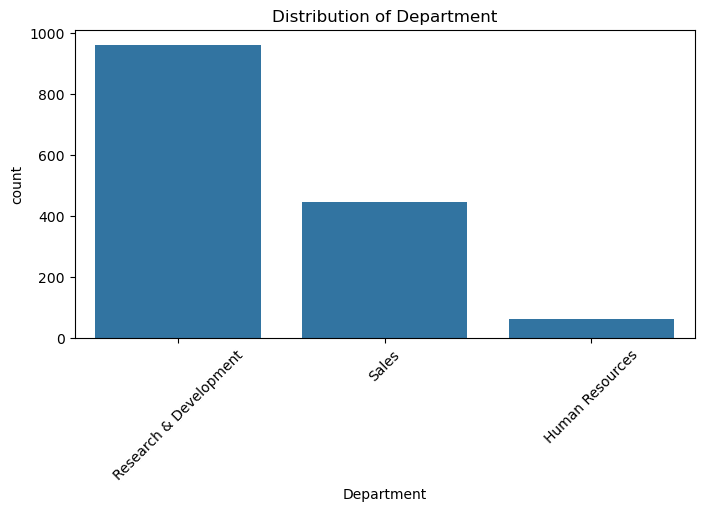

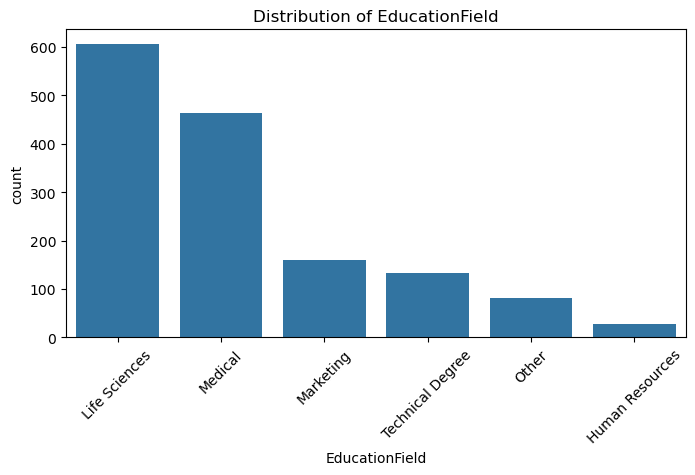

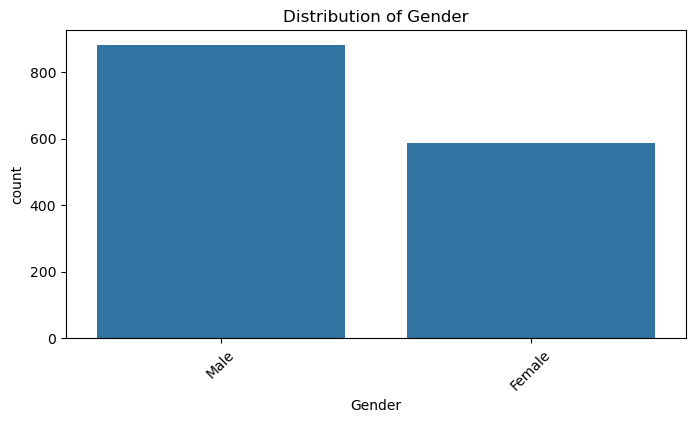

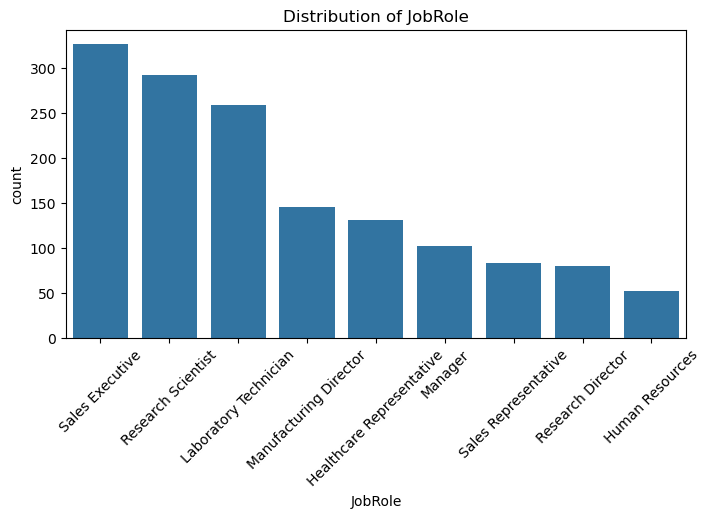

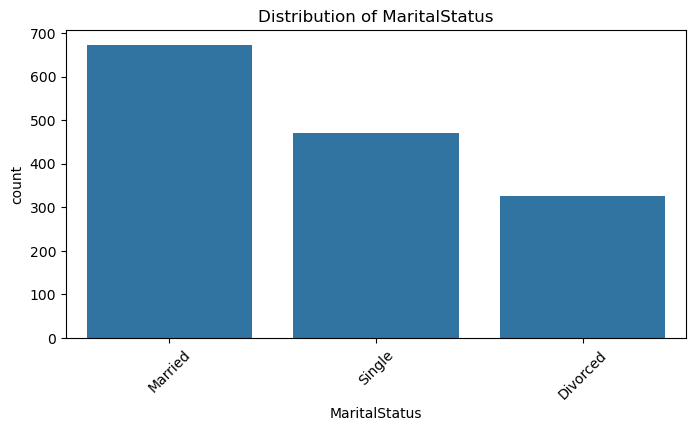

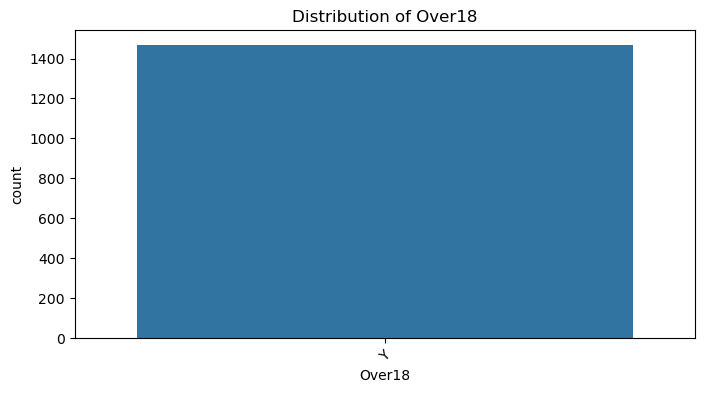

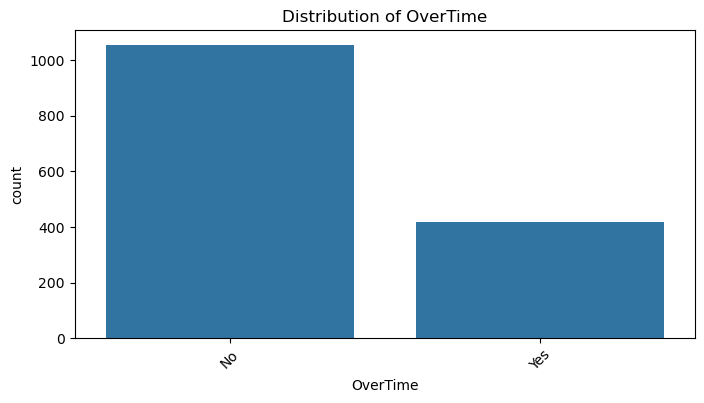

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

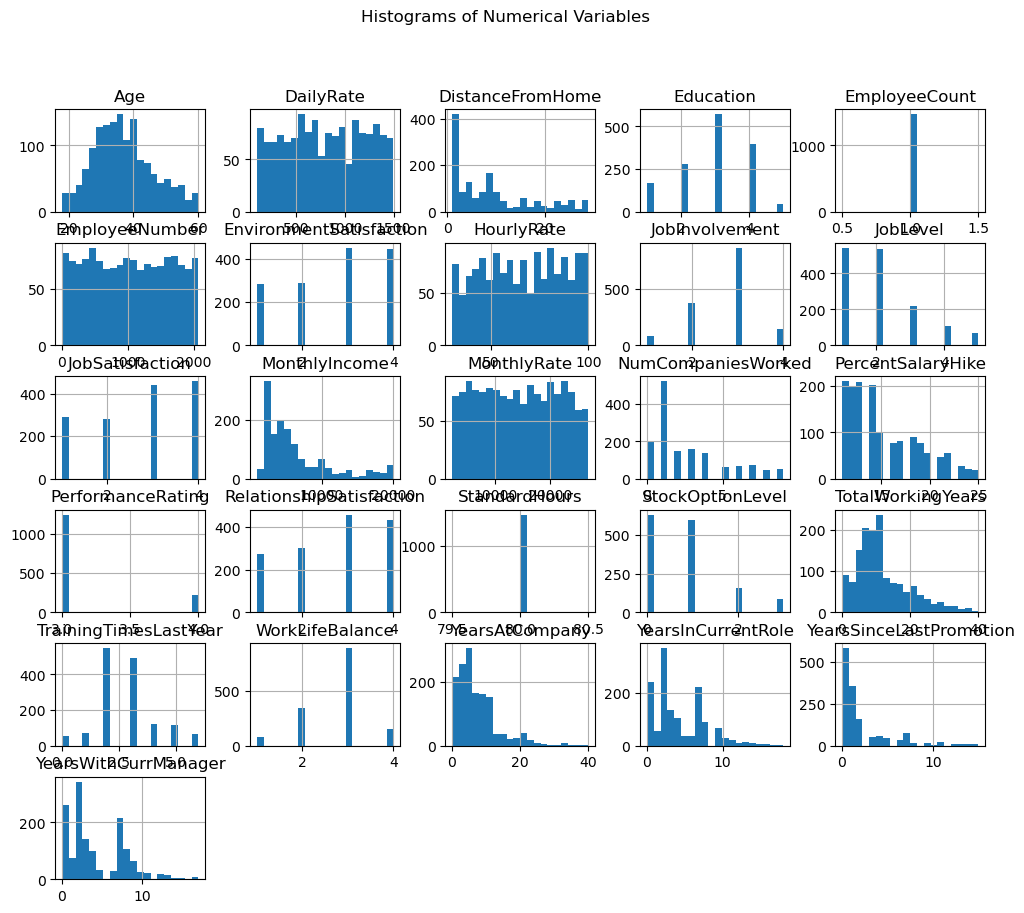

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

In [15]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])  # Select only numerical columns

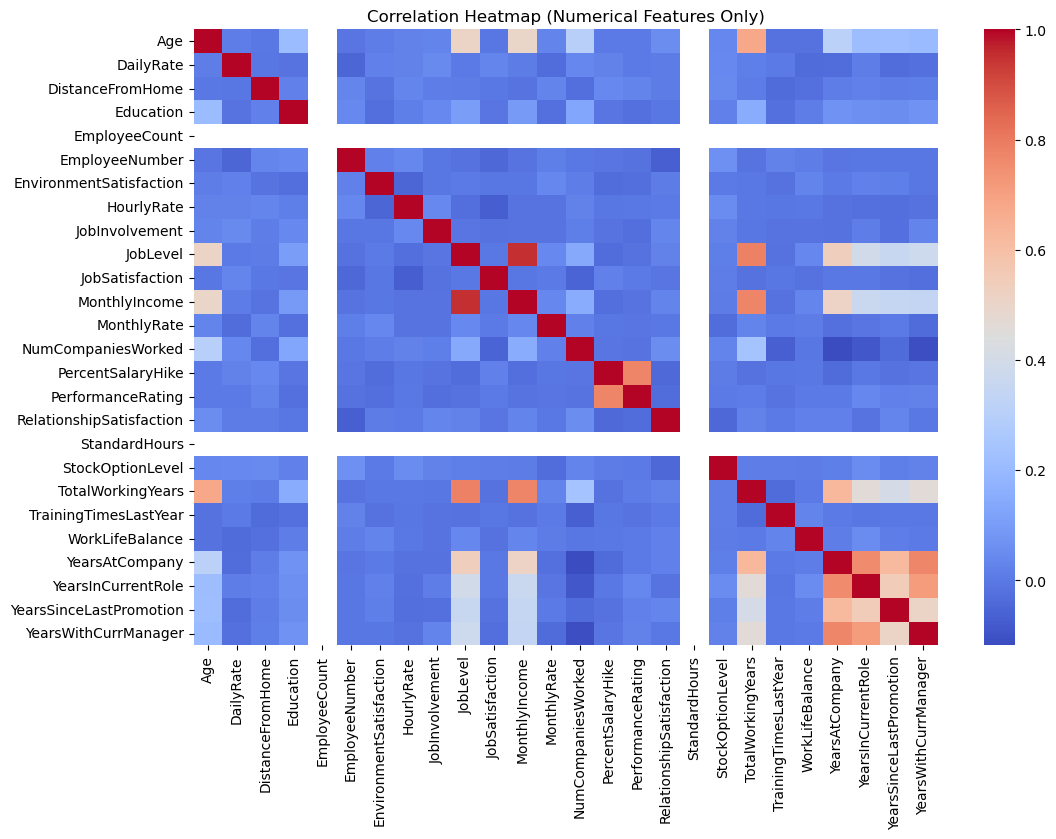

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

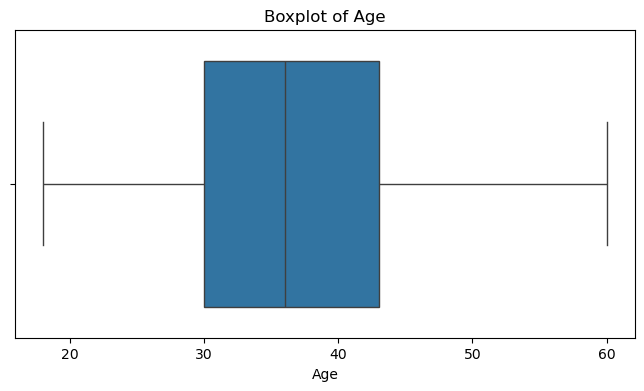

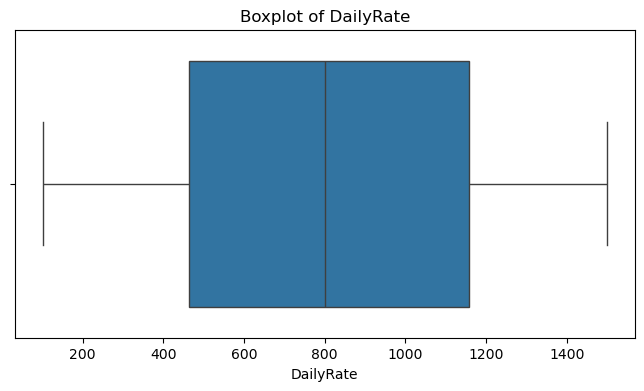

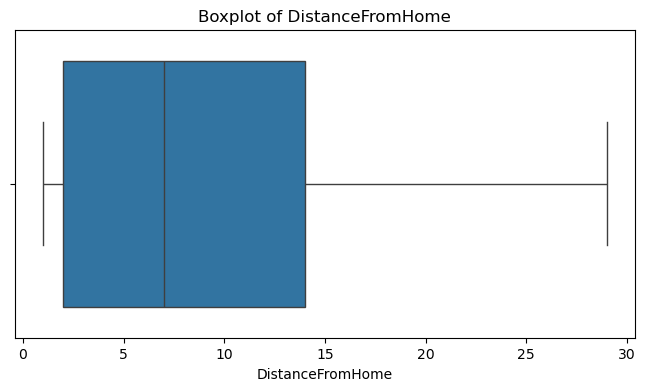

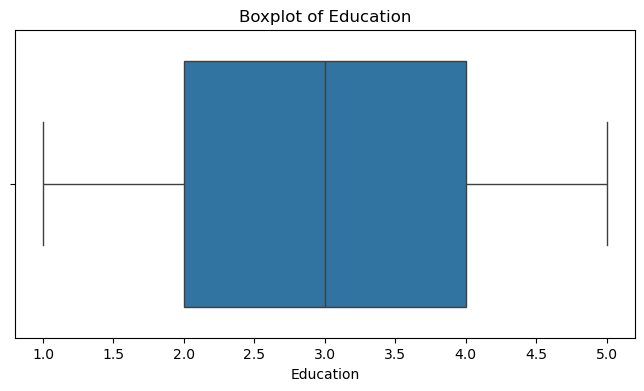

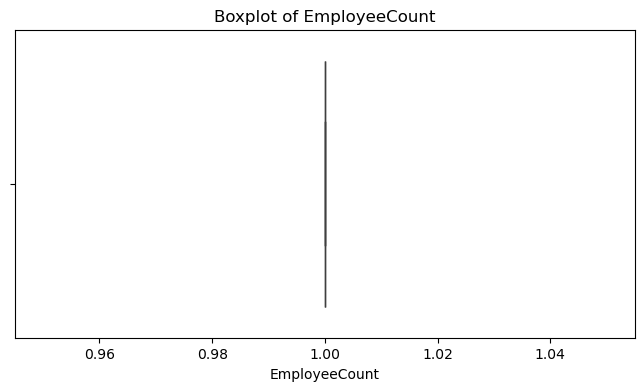

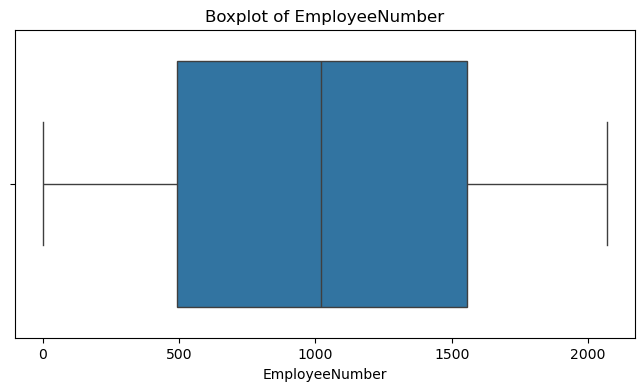

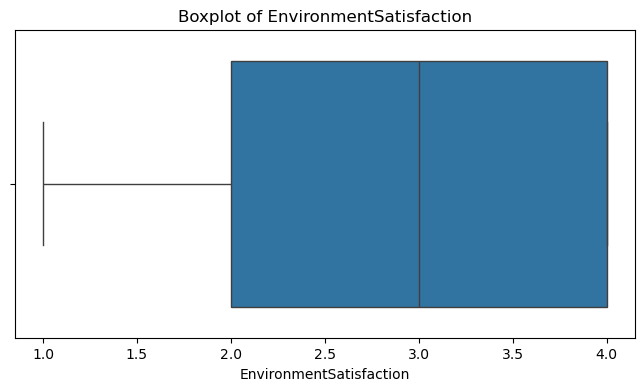

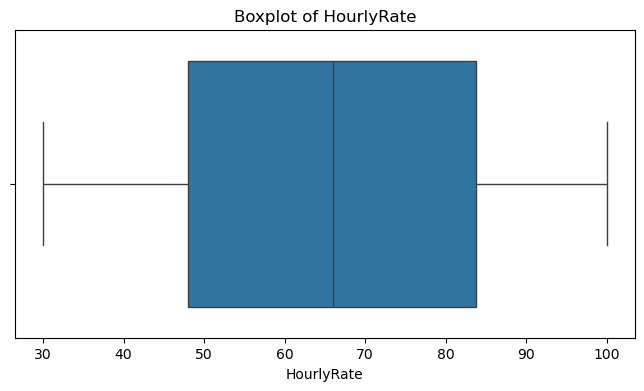

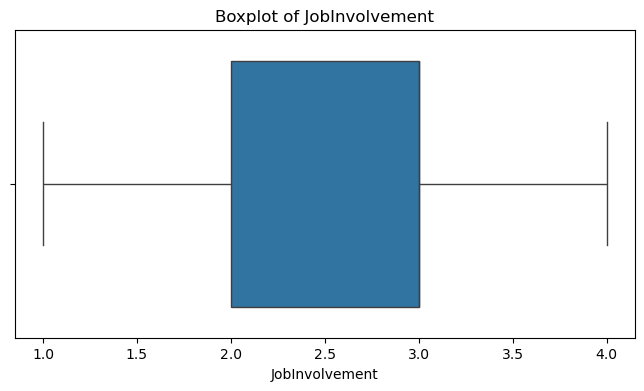

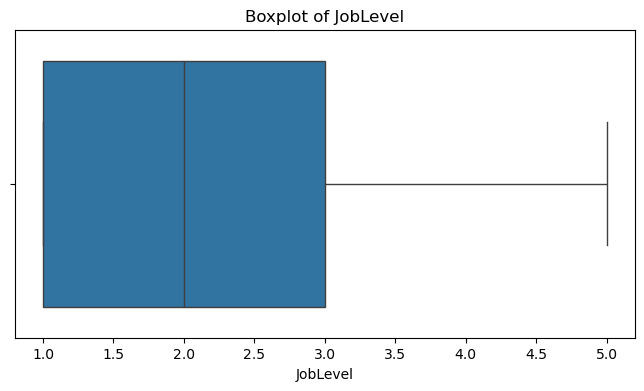

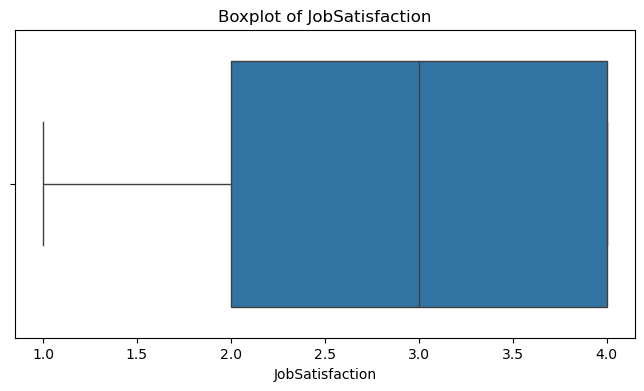

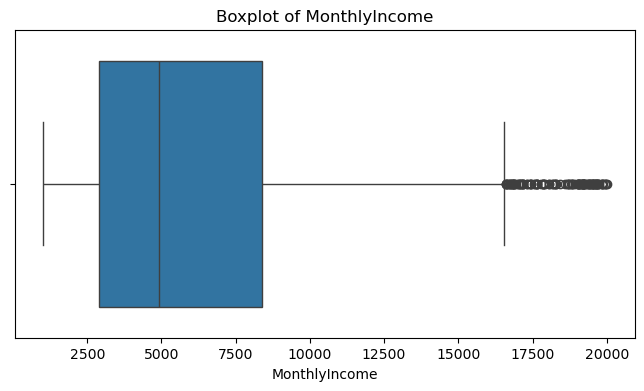

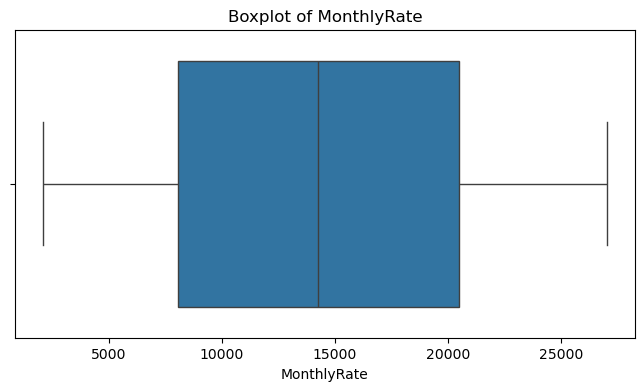

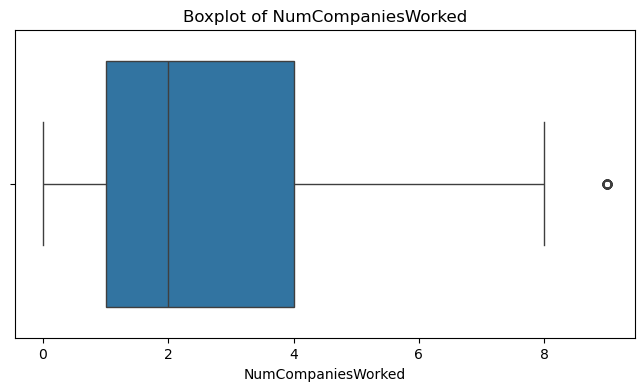

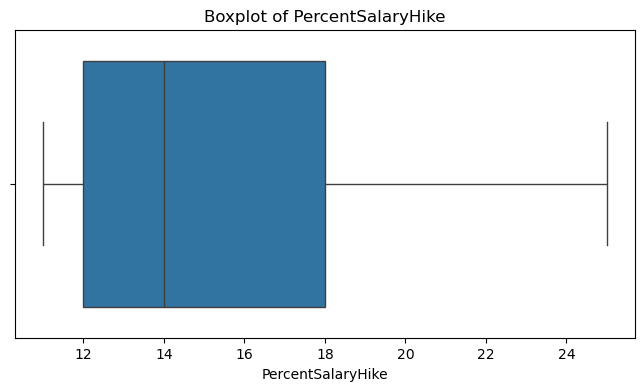

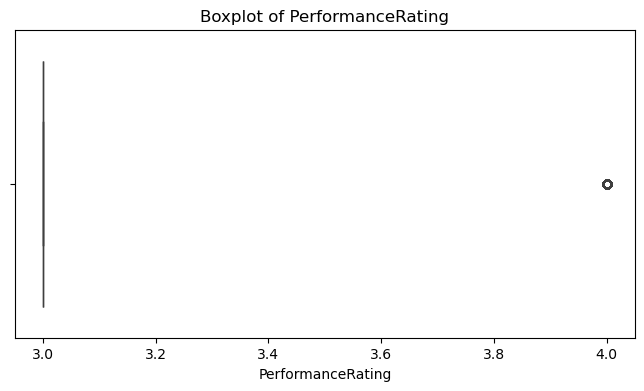

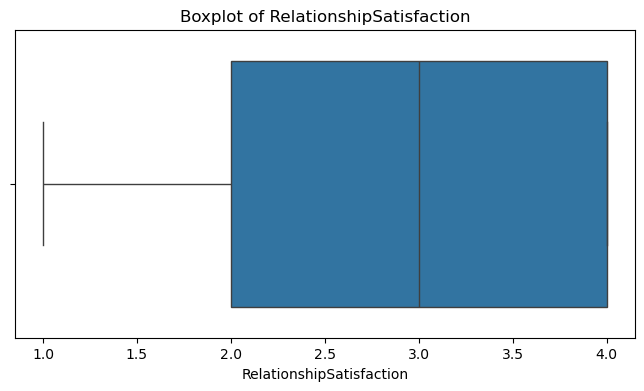

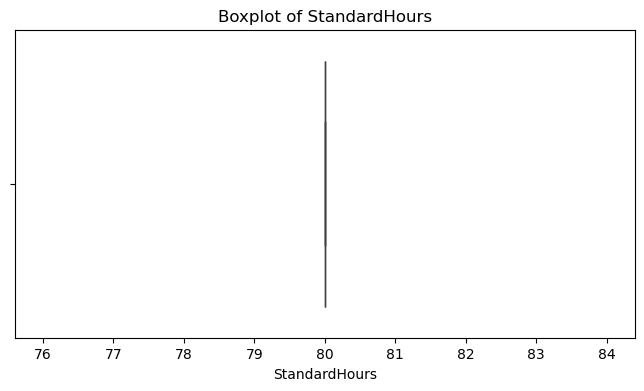

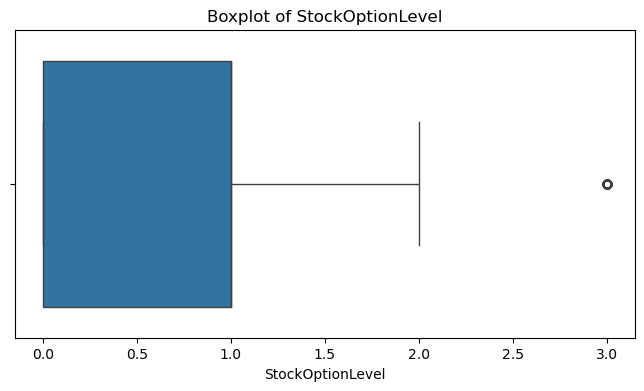

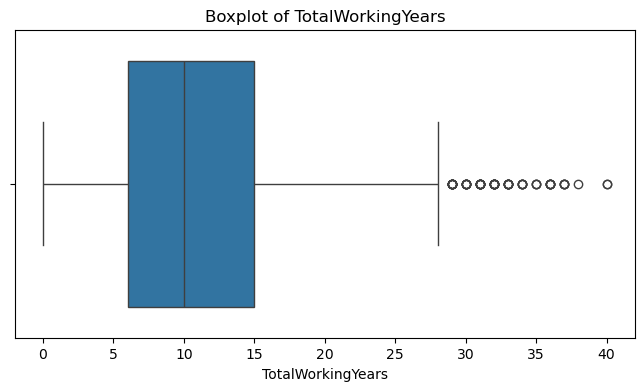

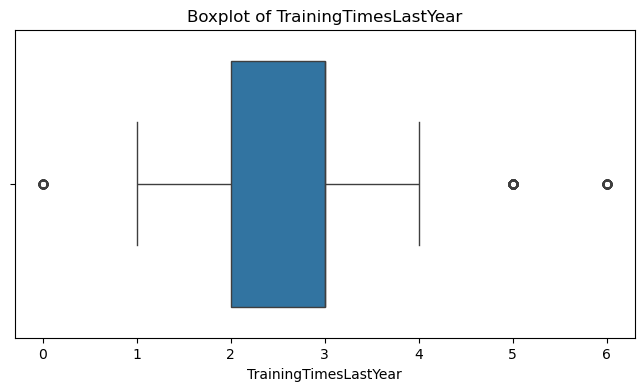

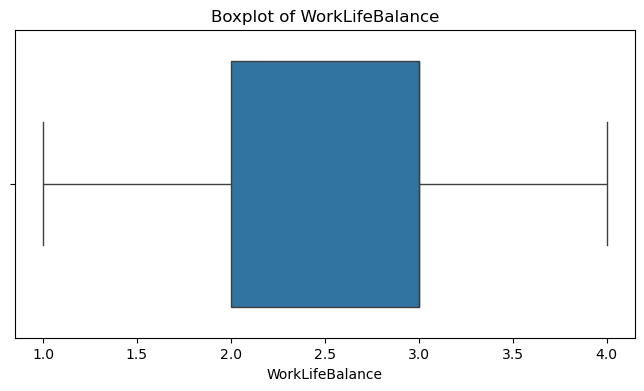

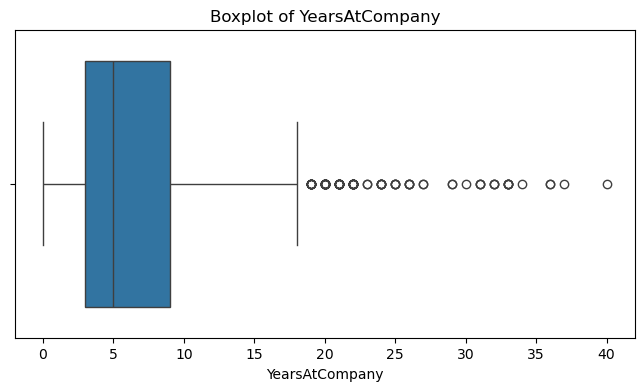

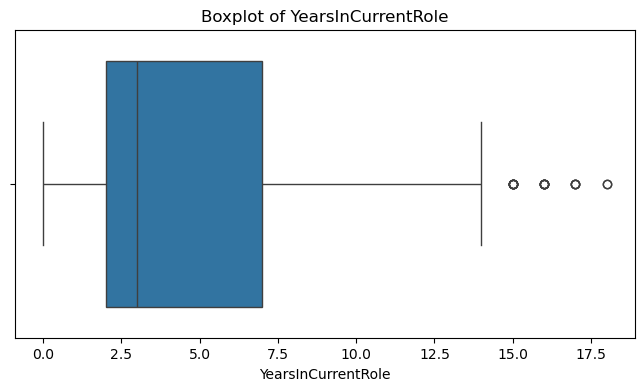

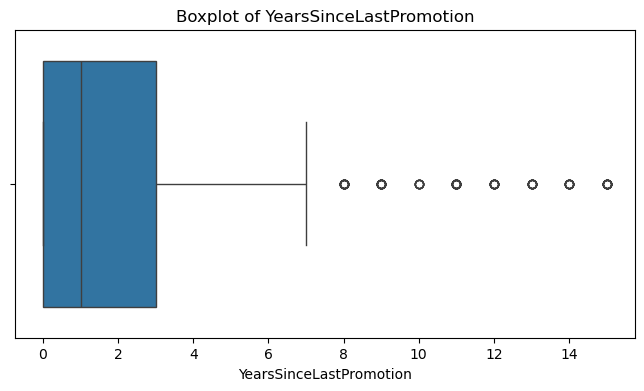

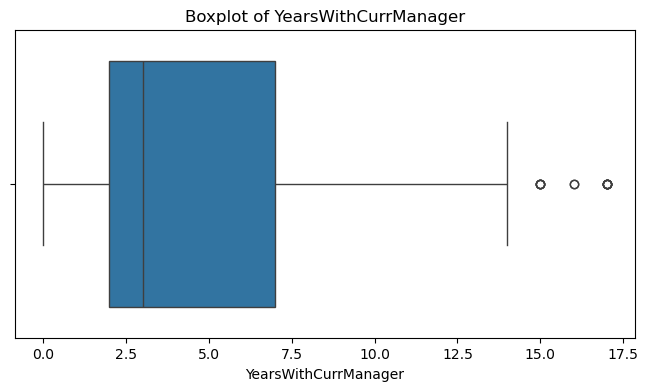

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

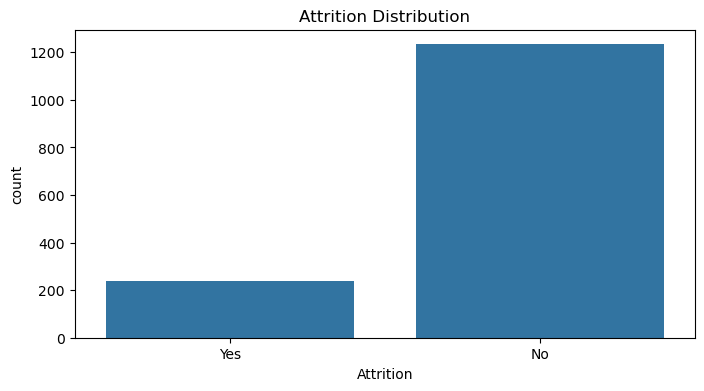

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Distribution')
plt.show()

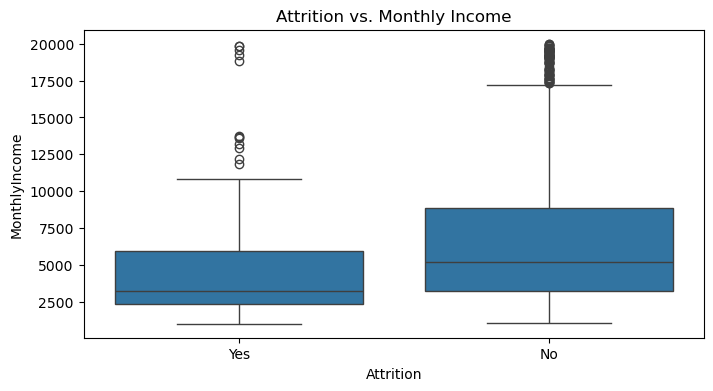

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Attrition vs. Monthly Income')
plt.show()

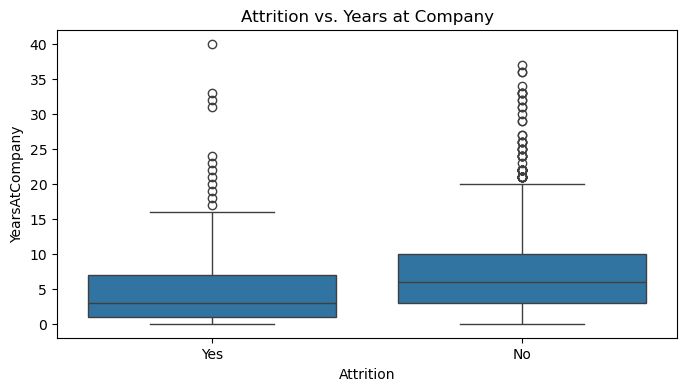

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Attrition vs. Years at Company')
plt.show()

In [31]:
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

In [33]:
high_correlation_pairs = []
threshold = 0.7

In [41]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append(
                (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            )

In [37]:
high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=["Variable 1", "Variable 2", "Correlation"])

In [39]:
print(high_correlation_df)

           Variable 1            Variable 2  Correlation
0            JobLevel         MonthlyIncome     0.950300
1            JobLevel     TotalWorkingYears     0.782208
2       MonthlyIncome     TotalWorkingYears     0.772893
3   PercentSalaryHike     PerformanceRating     0.773550
4      YearsAtCompany    YearsInCurrentRole     0.758754
5      YearsAtCompany  YearsWithCurrManager     0.769212
6  YearsInCurrentRole  YearsWithCurrManager     0.714365
